# Logistic Regression with Python

For this project we will be working with the Titanic dataset which is very famous dataset for implying various classification machine learning models.

In this project we will try to predict a classification of passenger survival ie survived or deceased.

We will be using logistic classfier to predict the binary classes.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets read the titanic train and test dataset into seperate dataframes.

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

## The Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets begin with some exploratory data analysis! 

## Exploratory Data Analysis

### Missing Data

Text(0.5, 1, 'Heap Map shwoing Null values in Train data')

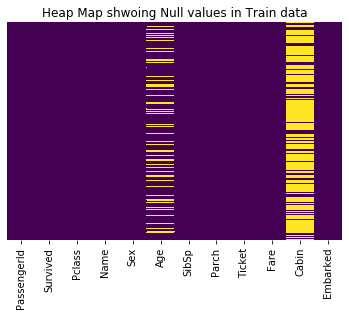

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title('Heap Map shwoing Null values in Train data')

Text(0.5, 1, 'Heap Map shwoing Null values in Test data')

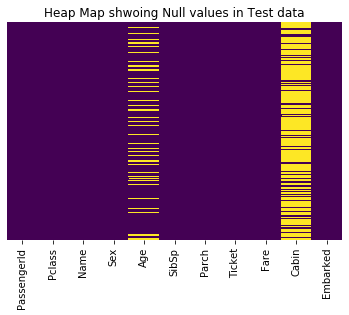

In [5]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title('Heap Map shwoing Null values in Test data')

Around 20 percent of the Age data is missing. We can replace age with some form of imputation since the proportion of Age missing is likely small enough. 


The Cabin column, it looks like too much of data is missing to do any analysis. We can opt to drop it later, or change it to another feature like "Cabin Known: 1 or 0"

Text(0.5, 1.0, 'Bar graph shwoing the count of survived/deceased')

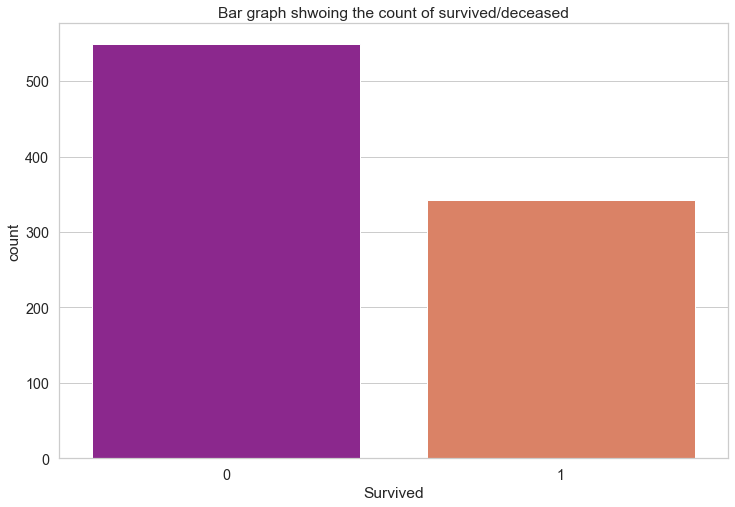

In [6]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='plasma').set_title("Bar graph shwoing the count of survived/deceased")

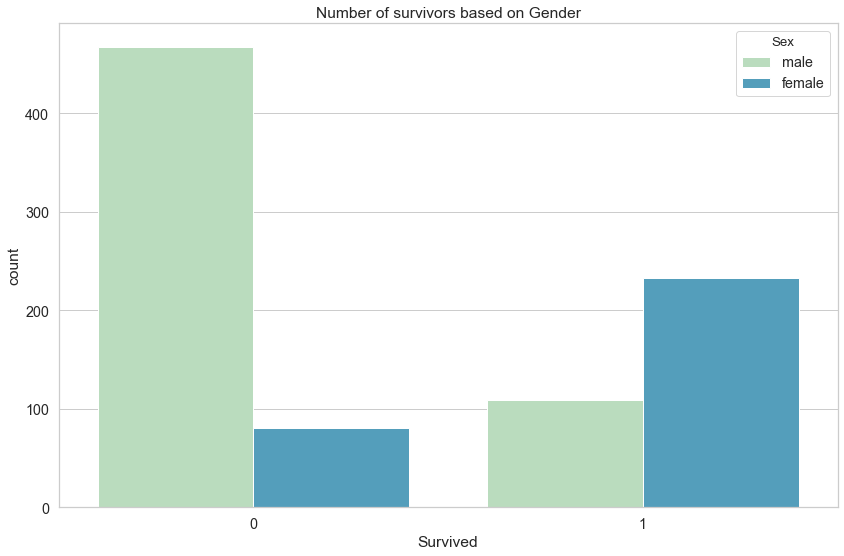

In [7]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.3)
sns.set_style('whitegrid')
f = sns.countplot(x="Survived", hue = "Sex",data = train, palette='GnBu')
f.set_title("Number of survivors based on Gender")
plt.tight_layout()

Above plot clearly sites that there were more number of female survivors than male.

Text(0.5, 1.0, 'Number of survivors based on Passanger calss')

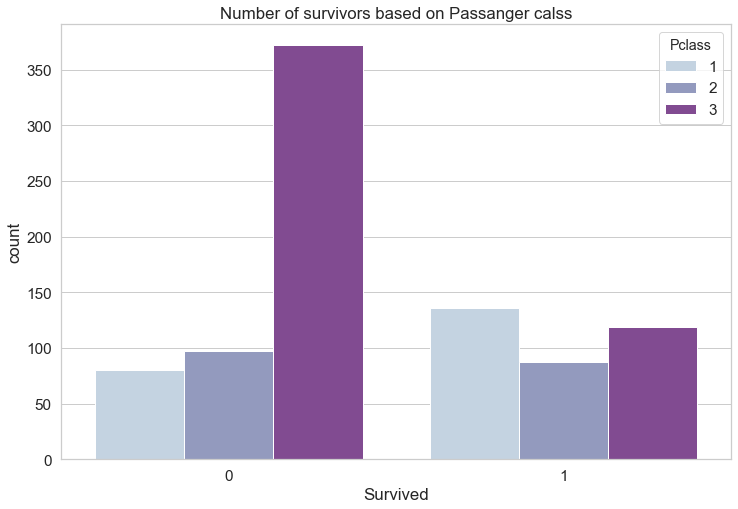

In [8]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.set_style('whitegrid')
sns.countplot('Survived',hue='Pclass',data=train,palette='BuPu').set_title('Number of survivors based on Passanger calss')

Most of the survivors belonged to Passanger class 1 & 3.

Lets check age distribution of passangers

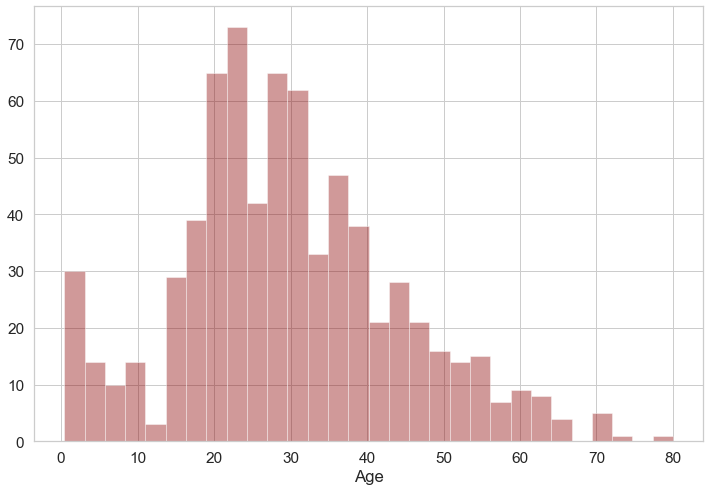

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(train['Age'].dropna(),kde = False, color ='darkred', bins =30)

Most of the passangers ranged between 15 to 45 years.

Lets check column SibSp which says number of siblings per passanger

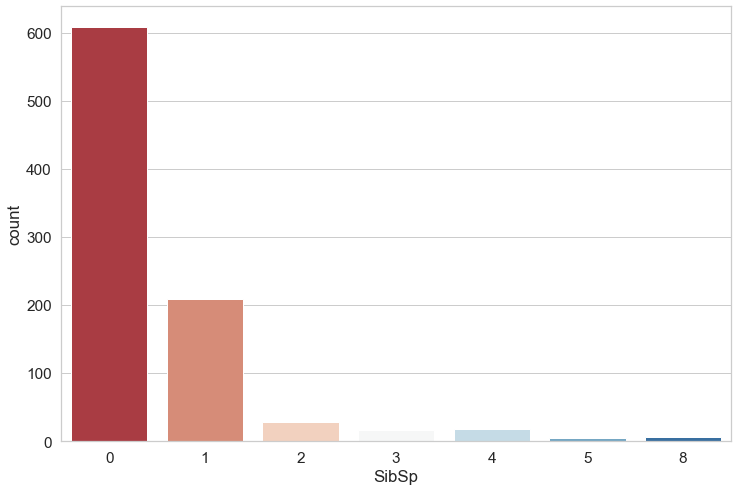

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='SibSp',data=train, palette='RdBu')

Text(0.5, 1.0, 'Distribution of Fare')

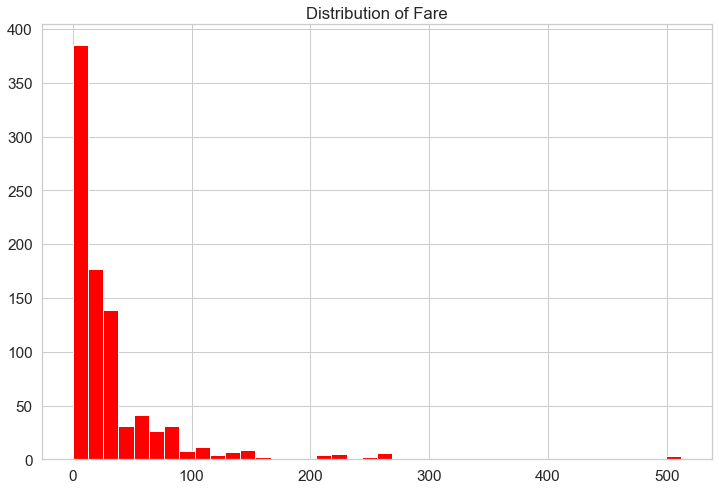

In [11]:
plt.figure(figsize=(12,8))
train["Fare"].hist(color='red',bins = 40).set_title("Distribution of Fare")


In [12]:
import cufflinks as cf
cf.go_offline()

In [13]:
plt.figure(figsize=(10,8))
train['Fare'].iplot(kind='hist',bins=30,color='purple')

<Figure size 720x576 with 0 Axes>

## Data Cleaning

We want to fill in missing data in age column instead of just dropping the missing age data rows. One way to do this is by filling in the mean the average age by passenger class.

Text(0.5, 1.0, 'Box plot showing age distribution in each passager class')

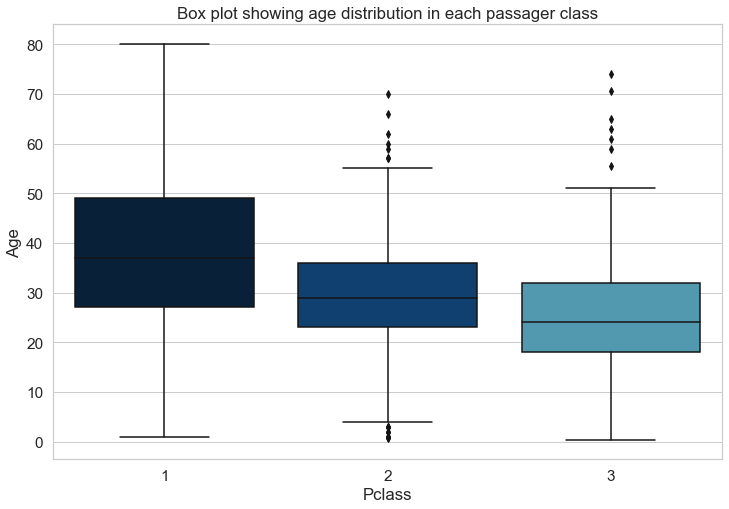

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train,palette='ocean').set_title('Box plot showing age distribution in each passager class')

- Most of 1 Pclass passangers were ranging from 30 to 50.
- Most of 2 Pclass passangers were ranging from 25 to 35.
- Most of 3 Pclass passangers were ranging from 18 to 32.

Lets use this information and fill in the missing information in age column.

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 26
        else:
            return 24
    else:
        return Age

In [16]:
train["Age"] = train[['Age','Pclass']].apply(impute_age,axis=1)
test["Age"] = test[['Age','Pclass']].apply(impute_age,axis=1)

Handling missing values in the cabin column.

Lets fill the null values with 'N'.


After that we will extrsct only first letter of cabin, which will be used for training the machine.

In [17]:
train['Cabin'] = train['Cabin'].fillna('N')

In [18]:
train["Cabin"] = train["Cabin"].apply(lambda s:s[0])

In [19]:
train['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Lets apply same procedure for Test data.

In [20]:
test['Cabin'] = test['Cabin'].fillna('N')
test["Cabin"] = test["Cabin"].apply(lambda s:s[0])
test['Cabin'].unique()

array(['N', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

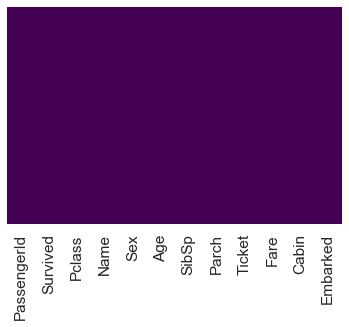

In [21]:
##checking for missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We do not have any missing data in training set.

Lets check for missing data in the test set.

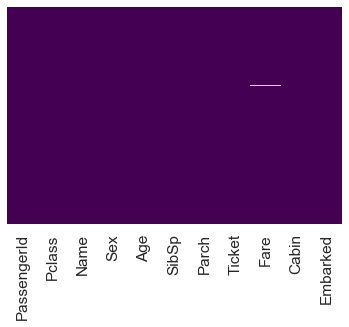

In [22]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We see that only one row in Fare colums is empty. Lets replace it with avg fare value.

In [23]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! 

In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
cabin = pd.get_dummies(train['Cabin'],drop_first=True)
pclass = pd.get_dummies(train['Pclass'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket','Cabin','Pclass'],axis=1,inplace=True)
train = pd.concat([train,sex,embark,cabin,pclass],axis=1)
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,B,C,D,E,F,G,N,T,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,1,0,0,1


### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
 X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.3)

### Training and Predicting

In [46]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=0.1)
lg.fit(X_train,y_train)

/Library/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predictions = lg.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       168
           1       0.78      0.69      0.73       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



**After feature engineering and tunig parameters we get an accurancy of 81% which good for Logistic Regression Classifier Model.**